In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('salary_data_cleaned.csv')

In [46]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_text,job_state,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\r\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\r\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\r\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\r\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\r\n,NY,1,22,1,0,0,0,1


In [47]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [48]:
def title_simplifier(title):
    if 'data scientis' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [49]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr'in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [50]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [51]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [52]:
df['seniority'] = df['Job Title'].apply(seniority)

In [53]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

## Fix State Los Angeles

In [54]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 IN              10
 WI              10
 UT              10
 MO               9
 AZ               9
 AL               8
 GA               6
 KY               6
 MI               6
 DE               6
 CT               5
 IA               5
 OR               4
 LA               4
 NE               4
 KS               3
 NM               3
 ID               2
 MN               2
 Los Angeles      1
 SC               1
 RI               1
Name: job_state, dtype: int64

In [55]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if  x.strip().lower() != 'los angeles' else 'CA' )

In [56]:
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
KY      6
MI      6
DE      6
GA      6
CT      5
IA      5
LA      4
OR      4
NE      4
KS      3
NM      3
MN      2
ID      2
SC      1
RI      1
Name: job_state, dtype: int64

## Job description length

In [57]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

## Competitors count

In [58]:
df['competitors_count']= df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [59]:
df.competitors_count

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: competitors_count, Length: 742, dtype: int64

## Hourly wage to Annual

In [60]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [61]:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


## Get rid of "\n" in the company name

In [62]:
df['company_text'] = df['company_text'].apply(lambda x: x.replace('\n', ''))

In [63]:
df['company_text']

0                          Tecolote Research\r
1      University of Maryland Medical System\r
2                                    KnowBe4\r
3                                       PNNL\r
4                         Affinity Solutions\r
                        ...                   
737                                      GSK\r
738                               Eventbrite\r
739           Software Engineering Institute\r
740                             Numeric, LLC\r
741             Riverside Research Institute\r
Name: company_text, Length: 742, dtype: object

In [64]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,desc_len,competitors_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [65]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'competitors_count'],
      dtype='object')

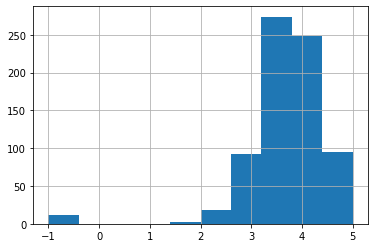

In [66]:
df.Rating.hist()

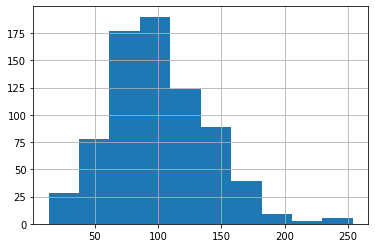

In [67]:
df.avg_salary.hist()

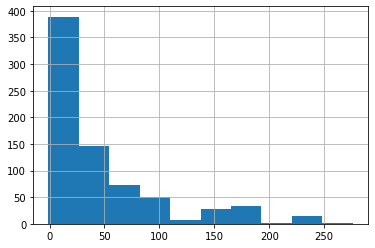

In [68]:
df.age.hist()

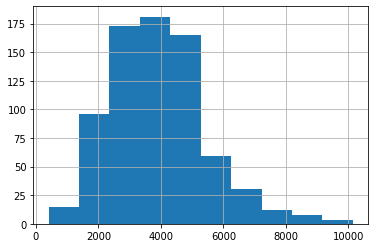

In [69]:
df.desc_len.hist()

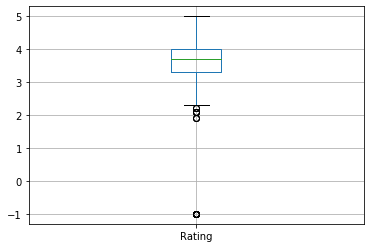

In [70]:
df.boxplot(column= 'Rating')

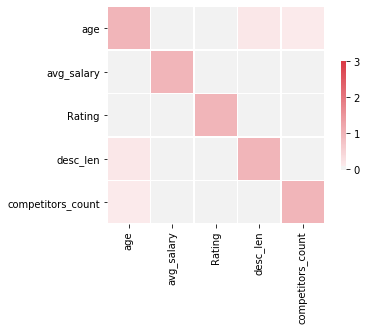

In [71]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len', 'competitors_count']].corr(), vmax=3, center=0, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [72]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'competitors_count'],
      dtype='object')

In [73]:
df_categorical = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'same_state',
            'python_yn', 'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

Graph for Location: total= 200


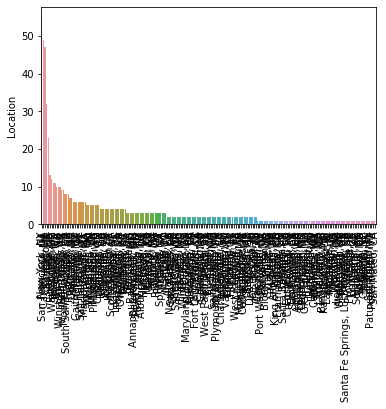

Graph for Headquarters: total= 198


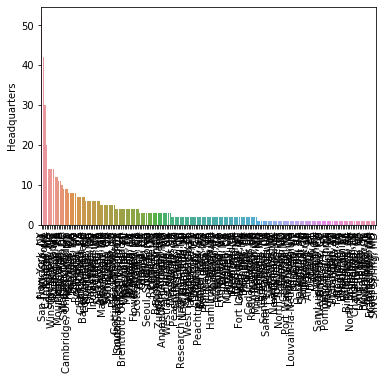

Graph for Size: total= 9


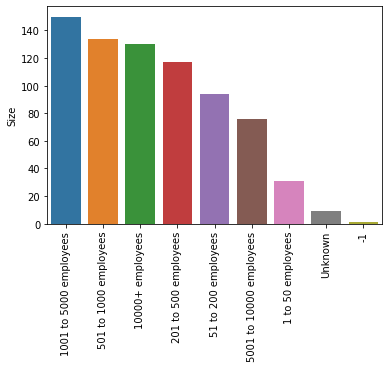

Graph for Type of ownership: total= 11


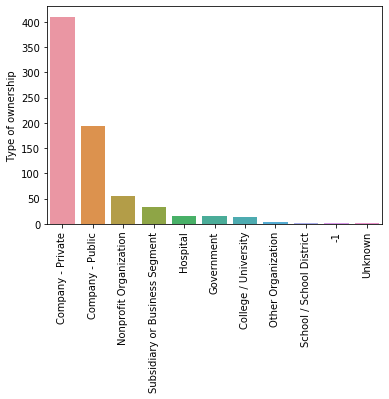

Graph for Industry: total= 60


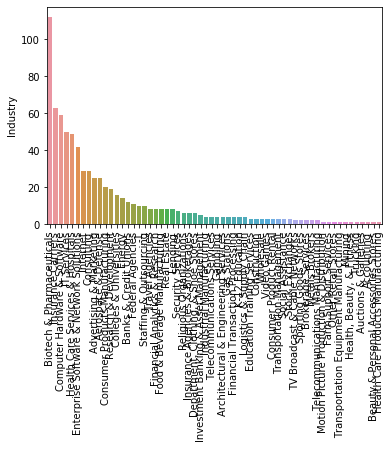

Graph for Sector: total= 25


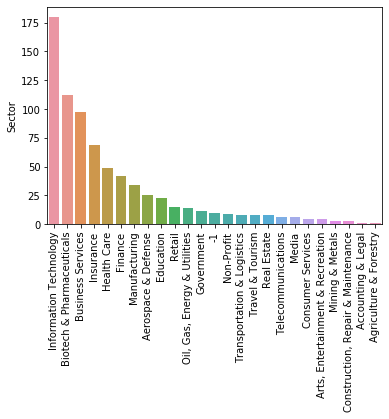

Graph for Revenue: total= 14


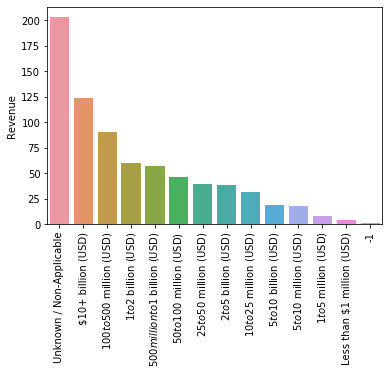

Graph for company_text: total= 343


C:\Users\juan.alric\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juan.alric\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


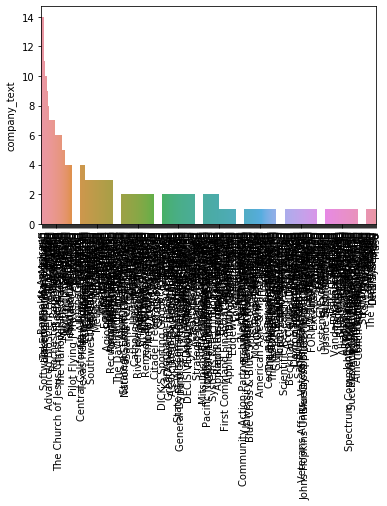

Graph for same_state: total= 2


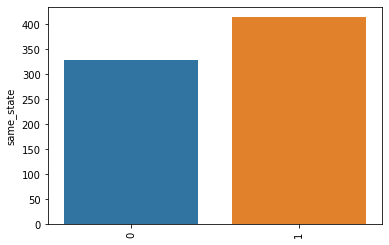

Graph for python_yn: total= 2


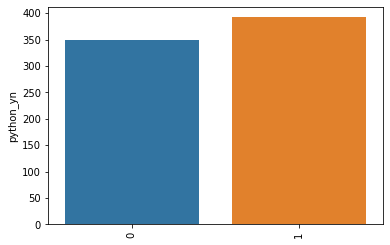

Graph for r_studio_yn: total= 2


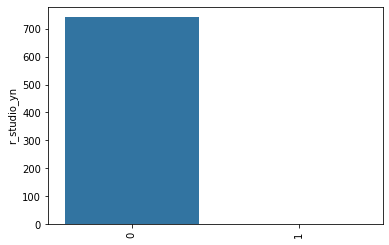

Graph for spark_yn: total= 2


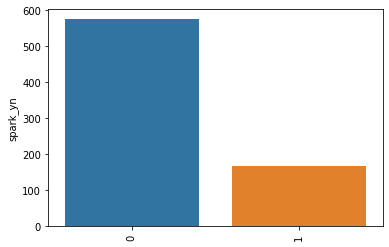

Graph for aws_yn: total= 2


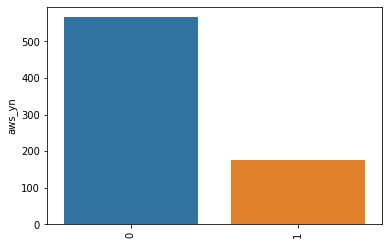

Graph for excel_yn: total= 2


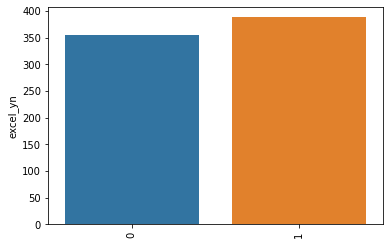

Graph for job_simp: total= 7


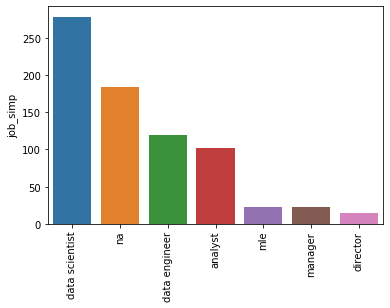

Graph for seniority: total= 3


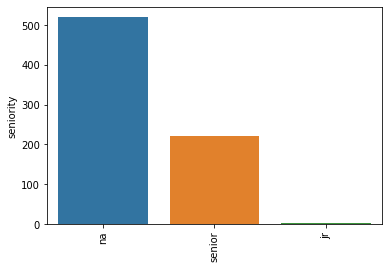

In [74]:
for i in df_categorical.columns:
    cat_num = df_categorical[i].value_counts()
    print('Graph for %s: total= %d' %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index , y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total= 20


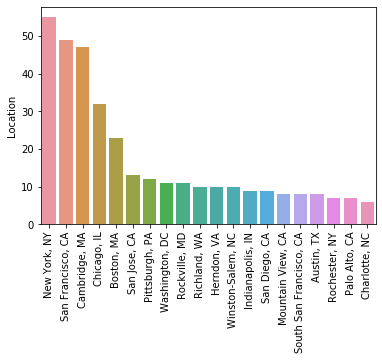

Graph for Headquarters: total= 20


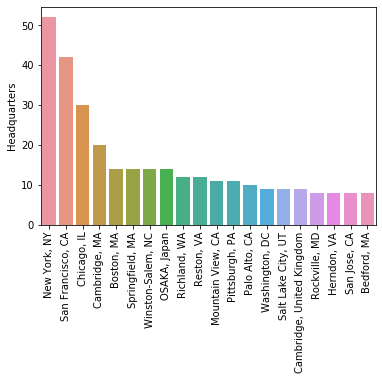

Graph for company_text: total= 20


C:\Users\juan.alric\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\juan.alric\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


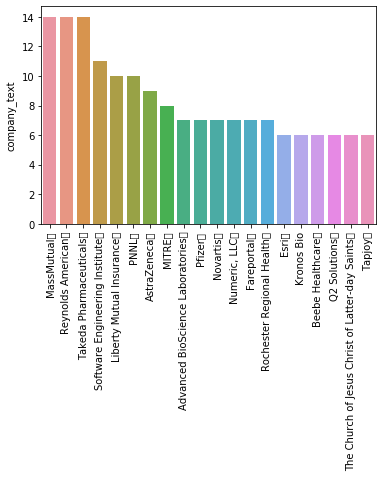

In [75]:
for i in df_categorical[['Location', 'Headquarters', 'company_text']].columns:
    cat_num = df_categorical[i].value_counts()[:20]
    print('Graph for %s: total= %d' %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index , y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [76]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'competitors_count'],
      dtype='object')

In [77]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [78]:
pd.pivot_table(df, index=['job_simp', 'seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [79]:
pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg_salary', aggfunc = 'count').sort_values('job_state', ascending=False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
...                              ...
AZ        analyst                  1
          na                       2
AL        na                       2
          data engineer            1
          analyst                  5

[114 rows x 1 columns]

In [80]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [81]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python_yn',
       'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'competitors_count'],
      dtype='object')

##  Rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_count and type of ownership

In [82]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'competitors_count', 'hourly', 'employer_provided', 'python_yn', 'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn','Type of ownership', 'avg_salary']]

In [83]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary' ).sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [84]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juan.alric\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

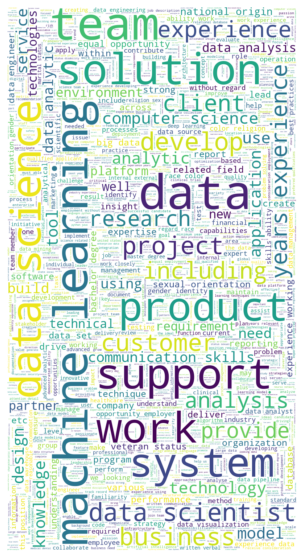

In [85]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [86]:
df.to_csv('eda_data.csv', index=False)